In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
import pandas as pd
def load_df(fp):
	df= pd.read_csv(fp, names=['id', 'ip', 'label', 'text']).set_index('id')
	df.drop_duplicates(inplace=True)
	df.dropna(inplace=True)
	df.info()
	return df
df_trn= load_df('C:/tmp/twitter_training.csv')
print()
df_tst= load_df('C:/tmp/twitter_training.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 70958 entries, 2401 to 9200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      70958 non-null  object
 1   label   70958 non-null  object
 2   text    70958 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB

<class 'pandas.core.frame.DataFrame'>
Index: 70958 entries, 2401 to 9200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      70958 non-null  object
 1   label   70958 non-null  object
 2   text    70958 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [5]:
df_trn.sample(5)

,ip,label,text
id,,,
3599,Facebook,Negative,"omg I just deactivated my facebook account, st..."
3370,Facebook,Neutral,@ EntertainerToys Hi placed an order that didn...
8817,Nvidia,Irrelevant,. @Five9: +79%. The @NICELtd: +39%
8629,NBA2K,Negative,@ NBA2K @ Beluba @ Ronnie2K WHY TO OPEN MY PLA...
11347,TomClancysRainbowSix,Negative,@Rainbow6Game fix random pick when someone is ...


In [6]:
df_trn['label'].value_counts()

label
Negative      21565
Positive      19549
Neutral       17398
Irrelevant    12446
Name: count, dtype: int64

In [7]:
df_trn= df_trn[df_trn['label']!='Irrelevant']
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58512 entries, 2401 to 9200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      58512 non-null  object
 1   label   58512 non-null  object
 2   text    58512 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [8]:
df_tst.sample(5)

,ip,label,text
id,,,
6865,johnson&johnson,Neutral,. 6 https://t.co/EjczatmbbD ]
5761,HomeDepot,Neutral,Target currently gives pay bumps of $ 0 2 per ...
2905,Dota2,Negative,Don't understand how the fuck this game gone s...
7896,MaddenNFL,Negative,I hate Madden like why I always miss my hitsti...
5916,HomeDepot,Negative,We here are all being lied to.


In [9]:
df_tst['label'].value_counts()

label
Negative      21565
Positive      19549
Neutral       17398
Irrelevant    12446
Name: count, dtype: int64

In [10]:
df_tst= df_tst[df_tst['label']!='Irrelevant']
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58512 entries, 2401 to 9200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      58512 non-null  object
 1   label   58512 non-null  object
 2   text    58512 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [11]:
nlp= spacy.load('en_core_web_sm')

In [12]:
def process_text(s):
	out= []
	for token in nlp(s):
		if not token.is_stop and not token.is_punct:
			out.append(token.lemma_)
	return ' '.join(out)

In [14]:
import swifter
df_trn['fltr'] = df_trn['text'].swifter.apply(process_text)

Pandas Apply: 100%|█████████████████████████████████████████| 58512/58512 [18:50<00:00, 51.77it/s]


In [15]:
df_trn.sample(5)

,ip,label,text,fltr
id,,,,
238,Amazon,Positive,I like buying it. Amazon Pantry Snacks Next se...,like buy Amazon Pantry Snacks section
2762,Borderlands,Negative,what is the horrible thing ever've ever made.....,horrible thing ever've @Borderlands @GearboxOf...
1331,Battlefield,Negative,@ EAHelp Hackers continue to make money from s...,EAHelp Hackers continue money steal account Ba...
12966,Xbox(Xseries),Neutral,The,
11199,TomClancysGhostRecon,Neutral,In this episode It seems with more investigati...,episode investigate island solely garbage disp...


In [17]:
import swifter
df_tst['fltr']= df_tst['text'].swifter.apply(process_text)

Pandas Apply: 100%|█████████████████████████████████████████| 58512/58512 [19:27<00:00, 50.14it/s]


In [18]:
df_tst.sample(5)

,ip,label,text,fltr
id,,,,
2265,CallOfDuty,Negative,"OK, so let's get on with it.",ok let
3854,Cyberpunk2077,Positive,I just saw that Keanu Reeves' motorcycle compa...,see Keanu Reeves motorcycle company go Cyberpu...
9314,Overwatch,Negative,Stop lecturing Moira,stop lecture Moira
8715,NBA2K,Negative,@NBA2K<unk> I get a refund for this garbage,@nba2k < unk > refund garbage
8577,NBA2K,Negative,@ Ron2K @ N2K I need the return of ASAP Fuck y...,ron2 K N2 K need return asap Fuck you think


In [19]:
enc= LabelEncoder()
y_trn= enc.fit_transform(df_trn['label'])
y_tst= enc.transform(df_tst['label'])

In [20]:
vct= TfidfVectorizer()
X_trn= vct.fit_transform(df_trn['fltr'])
X_tst= vct.transform(df_tst['fltr'])

In [21]:
def model_report(model, verbose=True):
	model.fit(X_trn, y_trn)

	y_pred=   model.predict(X_tst)
	trnScore= model.score(X_trn, y_trn)
	tstScore= model.score(X_tst, y_tst)
	cm= confusion_matrix(y_tst, y_pred)
	cr= classification_report(y_tst, y_pred)

	if verbose:
		print('Train Score: %f'%trnScore)
		print('Test Score:  %f'%tstScore)
		print('Classification Report:\n', cr)
		ConfusionMatrixDisplay(cm).plot()
		plt.show()
		print()
	
	return {
		'trn': trnScore,
		'tst': tstScore,
        'cm':  cm,
		'cr':  cr,
	}

In [22]:
models_dict= {
	'LogisticRegression':     LogisticRegression(max_iter=10_000),
	'Support Vector':         SVC(),
	'KNeighborsCLassifier':   KNeighborsClassifier(),
	'DecisionTreeClassifier': DecisionTreeClassifier(),
	'RandomForestClassifier': RandomForestClassifier(),
	'BaggingClassifier':      BaggingClassifier(),
	'ExtraTreesClassifier':   ExtraTreesClassifier(),
	'AdaBoostClassifier':     AdaBoostClassifier(),
	'XGBClassifier':          XGBClassifier(),
	'CatBoostClassifier':     CatBoostClassifier(verbose=False),
	'LGBMClassifier':         LGBMClassifier(),
}
models= [{'name':k, 'obj':v} for k,v in models_dict.items()]

i= 0
for model in models:
	print("Evaluating %s..."%model['name'])
	print("%d/%d models"%(i, len(models)), end='\r')
	model.update(model_report(model['obj'], verbose=False))
	i+= 1
print("%d/%d models evaluated"%(i, len(models)))
print("done")

Evaluating LogisticRegression...
Evaluating Support Vector...
Evaluating KNeighborsCLassifier...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
Evaluating BaggingClassifier...
Evaluating ExtraTreesClassifier...
Evaluating AdaBoostClassifier...
Evaluating XGBClassifier...
Evaluating CatBoostClassifier...
Evaluating LGBMClassifier...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.245855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131909
[LightGBM] [Info] Number of data points in the train set: 58512, number of used features: 3300
[LightGBM] [Info] Start training from score -0.998160
[LightGBM] [Info] Start training from score -1.212877
[LightGBM] [Info] Start training from score -1.096308
11/11 models evaluated
done


In [23]:
pd.DataFrame({
	'Algorithm':           [model['name'] for model in models],
	'Train Score':         [model['trn']  for model in models],
	'Test Score':          [model['tst']  for model in models],
}).set_index('Algorithm').sort_values(by='Test Score', ascending=False)

,Train Score,Test Score
Algorithm,,
DecisionTreeClassifier,0.978910,0.978910
ExtraTreesClassifier,0.978910,0.978910
RandomForestClassifier,0.978893,0.978893
BaggingClassifier,0.973510,0.973510
Support Vector,0.973305,0.973305
KNeighborsCLassifier,0.950232,0.949993
LogisticRegression,0.883221,0.883221
XGBClassifier,0.771910,0.771910
LGBMClassifier,0.754016,0.754016


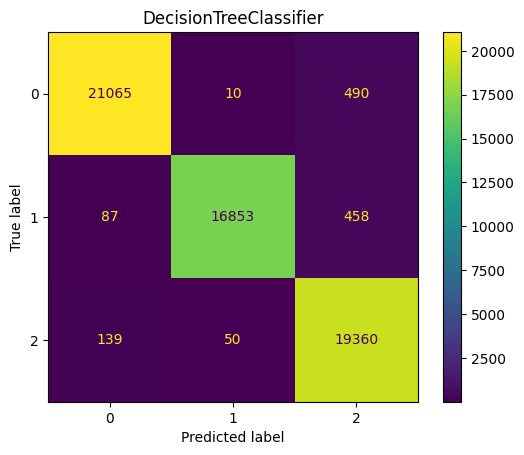

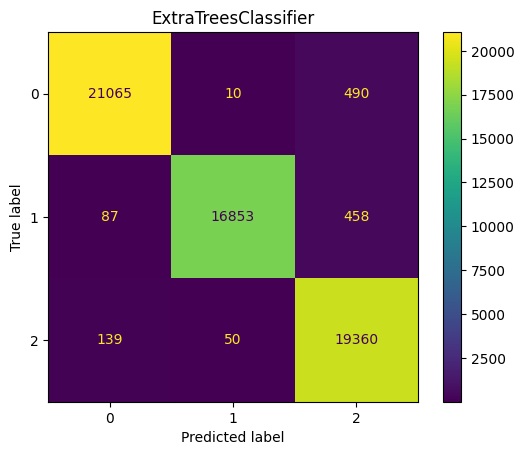

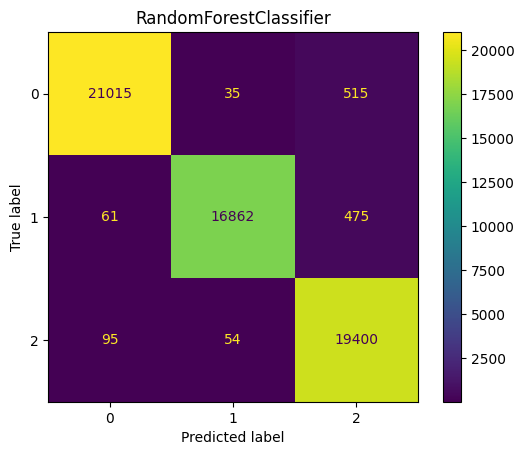

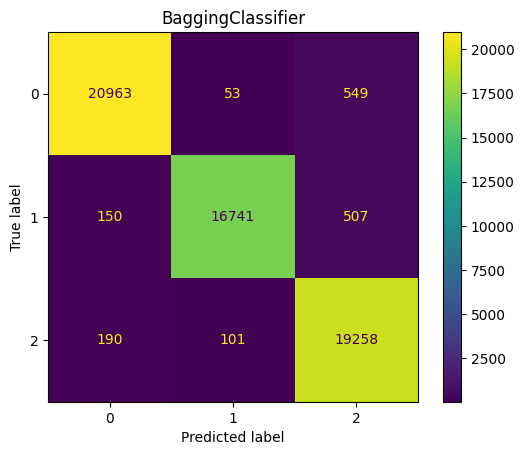

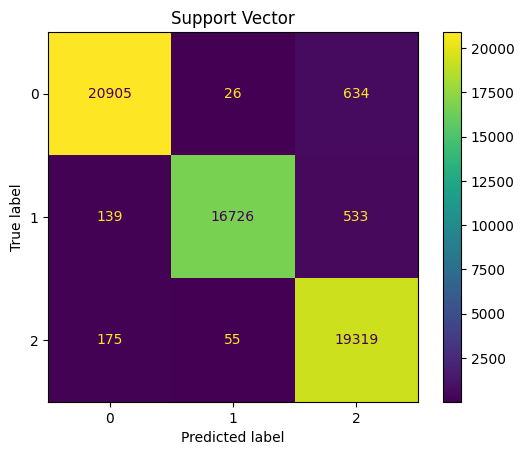

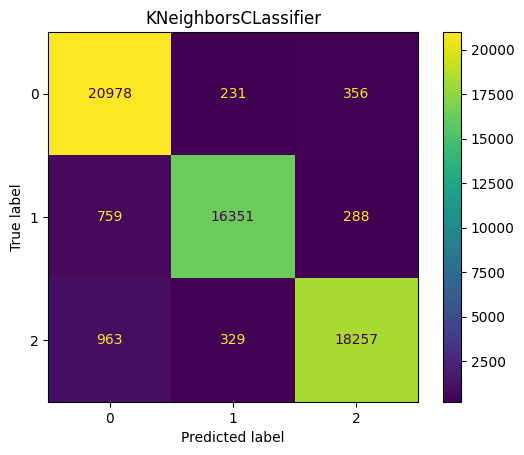

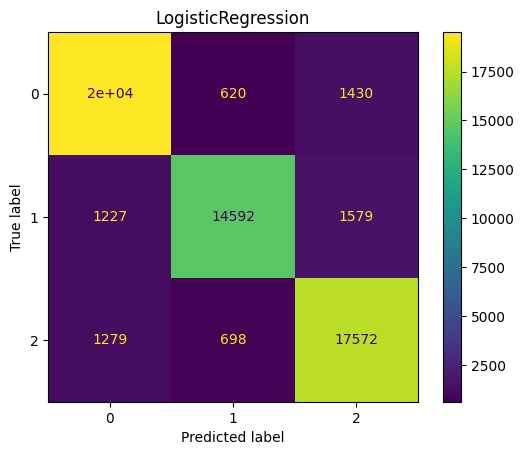

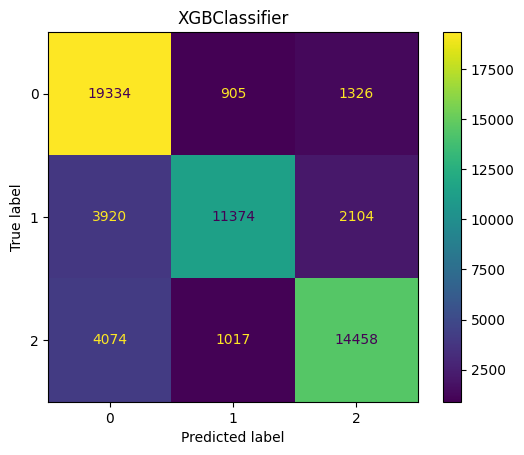

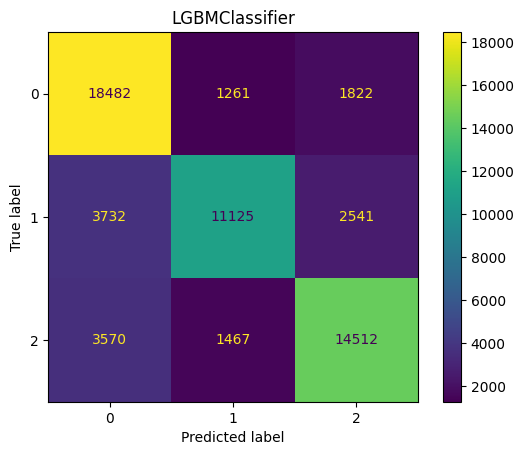

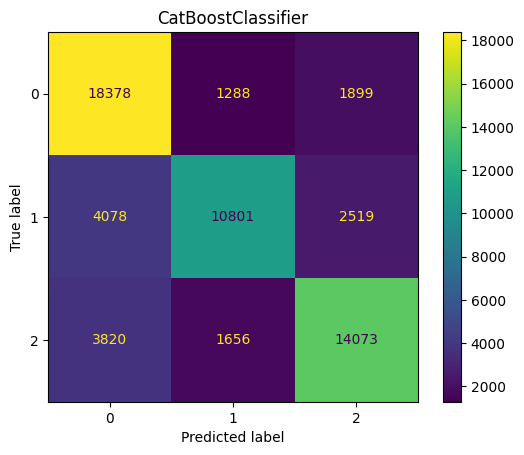

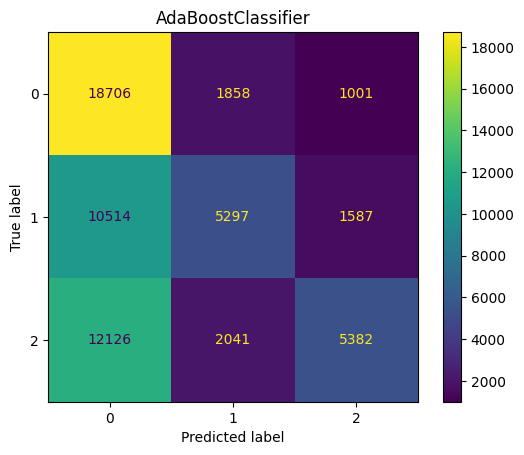

In [25]:
for model in sorted(models, key=lambda x: x['tst'], reverse=True):
	ConfusionMatrixDisplay(model['cm']).plot()
	plt.title(model['name'])